In [ ]:
#Con el coeficiente de pearson es mayor o menor a 0 nos dice si las variables tienen un comportamiento lineal
#Una serie es estacionaria cuando posee una media y varianza constante y no tiene seasonality
#Hay una prueba "Dicky Fuller" la cual determina si la serie es estacionaria
#Ho : Serie no estacionaria
#H1 : Srie es estacionaria
#Se hace parueba estadistica y si p < 0.05 (5%) entonces se descarta Ho

#Dolar

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/USDCOP=X.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-16,4513.250000,4547.759766,4485.950195,4513.250000,4513.250000,0
1,2023-05-17,4535.149902,4554.479980,4492.485840,4535.149902,4535.149902,0
2,2023-05-18,4515.569824,4523.339844,4451.113770,4515.569824,4515.569824,0
3,2023-05-19,4525.250000,4530.250000,4514.000000,4525.250000,4525.250000,0
4,2023-05-22,4540.250000,4540.250000,4526.990234,4540.250000,4540.250000,0
...,...,...,...,...,...,...,...
258,2024-05-10,3888.760010,3899.850098,3879.260010,3888.760010,3888.760010,0
259,2024-05-13,3889.110107,3889.370117,3885.760010,3889.110107,3889.110107,0
260,2024-05-14,3886.949951,3881.939941,3832.640625,3886.949951,3886.949951,0
261,2024-05-15,3851.750000,3858.000000,3822.340088,3851.750000,3851.750000,0


In [ ]:
ts = df['Close']

from statsmodels.tsa.stattools import adfuller
res = adfuller(ts)
res[1] < 0.05
print(res)
#No es estaria pq no cumple que sea < 0.05

(-2.2724595057927286, 0.1810042063449942, 16, 246, {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}, 2450.2689263782595)


In [ ]:
#Toca volverla estacionaria y para esto se toman las diferencias, en este caso no se toma el precio del dolar sino  la variacion del precio
#Es el valor actual menos el de ayer, por esta razon el primero no existe

(-5.430475379144498, 2.9221409355753233e-06, 15, 246, {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}, 2444.306160846748)
The new series is stationary.


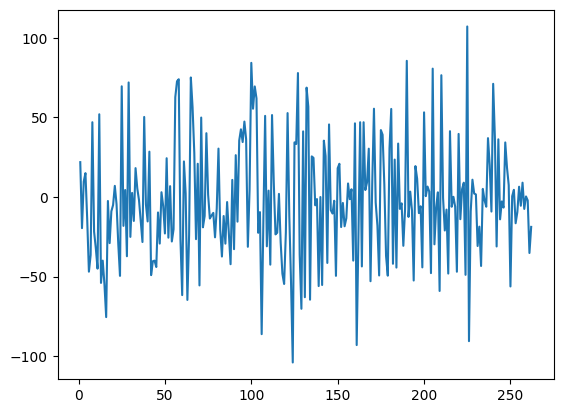

In [ ]:
ts_diff = ts.diff().dropna()

# Perform the Dickey-Fuller test on the new series
res = adfuller(ts_diff)

# Print the results of the test
print(res)

# If the p-value is less than 0.05, then the series is stationary
if res[1] < 0.05:
  print("The new series is stationary.")
else:
  print("The new series is not stationary.")

# Plot the new series
ts_diff.plot()
plt.show()

Es estacionaria porque el coeficiente lo menciona, la media se ve a simple vista y parece que la varianza no es constante sin embargo si lo es.

#Passengers

In [ ]:
df = pd.read_csv('/content/airline-passengers (4).csv', index_col= 0)
df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


<Axes: xlabel='Month'>

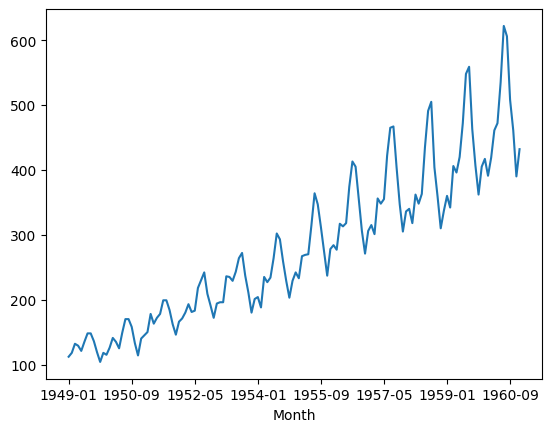

In [ ]:
import matplotlib.pyplot as plt

ts = df['Passengers']
ts.plot()

No es estacionaria pues incumple con los criterios de la media y la varianza constantes, se ve que tiene tendencia y cada vez mas se agranda la amplitud de la funcion

In [ ]:
#Pasos para desarrollar el ejercicio
#1). Dibujar y definir si es estacionaria, determinar cuales criterios incumple
#2). Dicky Fuller para determinar si es estacionaria
#3). Si no es estacionaria tomar diferencias como la nueva serie

(-2.8292668241700047, 0.05421329028382478, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854085)
The new series is not stationary.


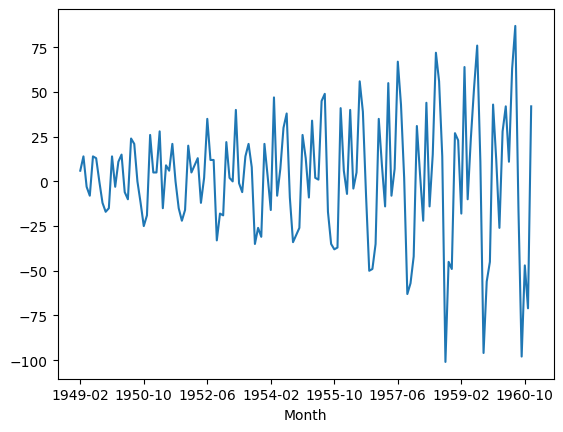

In [ ]:
ts_diff = ts.diff().dropna()

# Perform the Dickey-Fuller test on the new series
res = adfuller(ts_diff)

# Print the results of the test
print(res)

# If the p-value is less than 0.05, then the series is stationary
if res[1] < 0.05:
  print("The new series is stationary.")
else:
  print("The new series is not stationary.")

# Plot the new series
ts_diff.plot()
plt.show()


No es estacionaria pues incumple con los criterios de la media y la varianza constantes, se ve que tiene tendencia y cada vez mas se agranda la amplitud de la funcion. Ademas se hace la comprobacion con fuller

(-16.384231542468513, 2.7328918500142026e-29, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.6020417275611)
The new series is stationary.


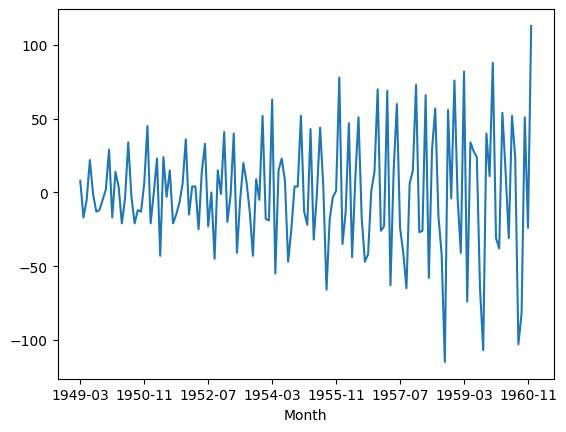

In [ ]:
ts_diff2 = ts_diff.diff().dropna()

res = adfuller(ts_diff2)

# Print the results of the test
print(res)

# If the p-value is less than 0.05, then the series is stationary
if res[1] < 0.05:
  print("The new series is stationary.")
else:
  print("The new series is not stationary.")

ts_diff2.plot()
plt.show()

Es estacionaria porque el coeficiente lo menciona a pesar de que no lo parezca

#Amtrax

<Axes: xlabel='Month'>

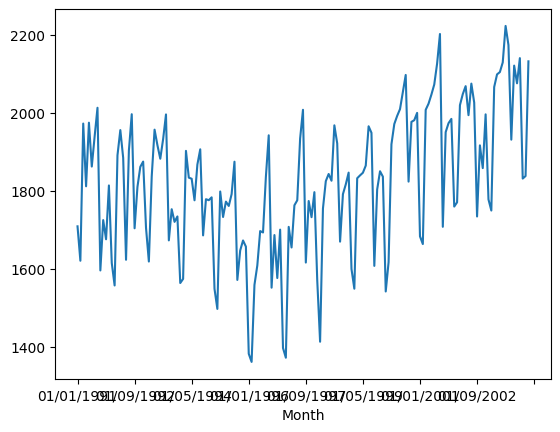

In [ ]:
df = pd.read_csv('/content/Amtrak.csv', index_col= 0)

ts = df['Ridership']
ts.plot()

No es estacionaria pues incumple con los criterios de la media y la varianza constantes, se ve que tiene tendencia y cada vez mas se agranda la amplitud de la funcion. Ademas se hace la comprobacion con fuller

(-3.33027073132272, 0.013578417815814557, 13, 144, {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}, 1627.5430043492092)
The new series is stationary.


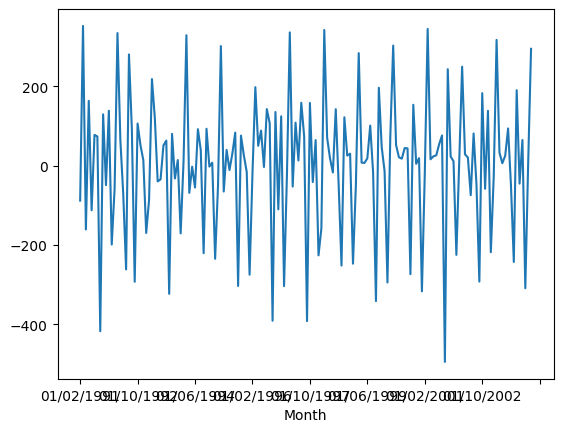

In [ ]:
ts_diff = ts.diff().dropna()

# Perform the Dickey-Fuller test on the new series
res = adfuller(ts_diff)

# Print the results of the test
print(res)

# If the p-value is less than 0.05, then the series is stationary
if res[1] < 0.05:
  print("The new series is stationary.")
else:
  print("The new series is not stationary.")

# Plot the new series
ts_diff.plot()
plt.show()

Es estacionaria porque el coeficiente lo menciona, la media se ve a simple vista y parece que la varianza no es constante sin embargo si lo es.